In [27]:
import sys
sys.path.append('../../src/')
import csv
import pickle as pk

import numpy as np
import scipy.sparse as sp
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

# shifted cmap (useful to plot correlation matrices)
s_cmap = shiftedColorMap(plt.cm.seismic, start= -0.4, midpoint=0., stop=1.0, name='shiftedcmap')
#s_cmap = shiftedColorMap(plt.cm.seismic,  midpoint=0., name='shiftedcmap')

## Sector alignment dictionaries generated

In [10]:
# python lists, sectors
with open('../SP1500/Sectors_SP1500_20030101_20150415.csv', 'r') as f:
    reader = csv.reader(f)
    sectors = list(reader)
    
all_sectors = list(set(i[3] for i in sectors))
all_sectors.remove('SPY')

In [11]:
all_sectors

['Energy',
 'Industrials',
 'Consumer_Discretionary',
 'Information_Technology',
 'Financials',
 'Utilities',
 'Health_Care',
 'Materials',
 'Telecommunications_Services',
 'Consumer_Staples']

In [12]:
all_d = list(set(i[0] for i in sectors))
all_d

['XLE', 'XLB', 'XTL', 'XLK', 'XLP', 'XLU', 'XLI', 'XLY', 'SPY', 'XLV', 'XLF']

In [13]:
all_sectors_short = ['Health',
 'Telecom',
 'Mat',
 'C_Staples',
 'Financials',
 'Utilities',
 'Energy',
 'Indust',
 'C_Discret',
 'IT']

In [14]:
all_d = list(set((i[0],i[3]) for i in sectors))

In [15]:
all_d

[('XLV', 'Health_Care'),
 ('SPY', 'SPY'),
 ('XLU', 'Utilities'),
 ('XLF', 'Financials'),
 ('XLP', 'Consumer_Staples'),
 ('XTL', 'Telecommunications_Services'),
 ('XLE', 'Energy'),
 ('XLY', 'Consumer_Discretionary'),
 ('XLB', 'Materials'),
 ('XLK', 'Information_Technology'),
 ('XLI', 'Industrials')]

In [18]:
hists = np.zeros(len(all_sectors))
sectors_ = sectors[1:]

for c in sectors_:
     hists[all_sectors.index(c[3])]+=1

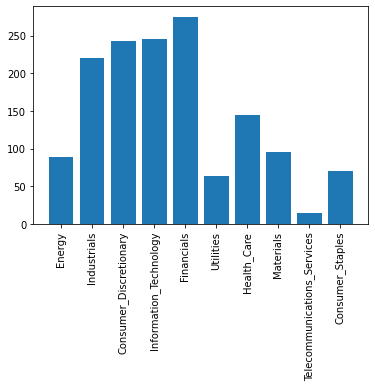

In [19]:
plt.figure();
plt.bar(np.arange(len(all_sectors)), hists);
plt.xticks(np.arange(10), all_sectors, rotation='vertical');

In [20]:
sectors_

[['XLK', '1', 'A', 'Information_Technology'],
 ['XLB', '2', 'AA', 'Materials'],
 ['XLY', '3', 'AAN', 'Consumer_Discretionary'],
 ['XLI', '4', 'AAON', 'Industrials'],
 ['XLY', '3', 'AAP', 'Consumer_Discretionary'],
 ['XLK', '1', 'AAPL', 'Information_Technology'],
 ['XLF', '5', 'AAT', 'Financials'],
 ['XLI', '4', 'AAWW', 'Industrials'],
 ['XLV', '6', 'ABAX', 'Health_Care'],
 ['XLV', '6', 'ABBV', 'Health_Care'],
 ['XLV', '6', 'ABC', 'Health_Care'],
 ['XLI', '4', 'ABM', 'Industrials'],
 ['XLV', '6', 'ABMD', 'Health_Care'],
 ['XLV', '6', 'ABT', 'Health_Care'],
 ['XLY', '3', 'ACAT', 'Consumer_Discretionary'],
 ['XLF', '5', 'ACC', 'Financials'],
 ['XLI', '4', 'ACET', 'Industrials'],
 ['XLE', '7', 'ACI', 'Energy'],
 ['XLK', '1', 'ACIW', 'Information_Technology'],
 ['XLI', '4', 'ACM', 'Industrials'],
 ['XLK', '1', 'ACN', 'Information_Technology'],
 ['XLV', '6', 'ACOR', 'Health_Care'],
 ['XLV', '6', 'ACT', 'Health_Care'],
 ['XLK', '1', 'ACXM', 'Information_Technology'],
 ['XLK', '1', 'ADBE', 'In

In [26]:
sector_alignment_dict = dict(zip(np.array(sectors_)[:,2], np.array(np.array(sectors_)[:,1], dtype=int)-1))

In [28]:
with open('sector_alignment.pk', 'wb') as handle:
    pk.dump(sector_alignment_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('sector_alignment.pk', 'rb') as handle:
    b = pk.load(handle)

In [41]:
sector_numbers_df = pd.DataFrame(sectors_)
sector_numbers_df

,0,1,2,3
0,XLK,1,A,Information_Technology
1,XLB,2,AA,Materials
2,XLY,3,AAN,Consumer_Discretionary
3,XLI,4,AAON,Industrials
4,XLY,3,AAP,Consumer_Discretionary
...,...,...,...,...
1454,XLF,5,ZION,Financials
1455,XLV,6,ZMH,Health_Care
1456,XLY,3,ZQK,Consumer_Discretionary
1457,XLV,6,ZTS,Health_Care


In [43]:
sector_numbers_df.drop([0,2], inplace=True, axis=1)

In [45]:
sector_numbers_df.drop_duplicates(inplace=True)
sector_numbers_df

,1,3
0,1,Information_Technology
1,2,Materials
2,3,Consumer_Discretionary
3,4,Industrials
6,5,Financials
8,6,Health_Care
17,7,Energy
27,8,Consumer_Staples
35,9,Utilities
84,10,Telecommunications_Services


In [51]:
sector_numbers_df[1] = np.array(sector_numbers_df[1], dtype=int) - 1

In [54]:
sector_label_map_names_dict = dict(sector_numbers_df.values)
with open('sector_label_map_names_dict.pk', 'wb') as handle:
    pk.dump(sector_label_map_names_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('sector_label_map_names_dict.pk', 'rb') as handle:
    b = pk.load(handle)
b == sector_label_map_names_dict

True